In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [63]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
pd.set_option('display.max_columns', None)

In [97]:
def load_raw_data(file):
    filePath = Path('C:\\Temp\\MRes\\training_data', file)
    data = pd.read_csv(filePath)
    return data

def feature_target(data):
    data = data.drop(columns=['geometry'])
    X, y = data.iloc[:,1:], data['GENUS']
    return(X, y)

def train_SVM(X_train, y_train):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_RF(X_train, y_train):
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_AB(X_train, y_train):
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def print_metrics(y_test, y_pred, X_test, model):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('F1:', metrics.f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.precision_score(y_test, y_pred, average='weighted'))

def conf_matrix(model, X_test, y_test, file):
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath)
    plt.show()
    
def feature_importance_rank(model, model_name, file):
    fig, ax = plt.subplots(figsize=(10, 7))
    skplt.estimators.plot_feature_importances(model, feature_names = col_heads, title=model_name, max_num_features = 10, ax=ax)
    ax.set_ylabel('Importance')
    plt.xticks(rotation=45, ha="right")
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath)
    plt.show()
    
def output_performance_report(y_test, y_pred, file):
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    filePath = Path('C:\\Temp\\MRes\\tree_class_results', file)
    df.to_csv(filePath)

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [92]:
# Load the dataset
data = load_raw_data('AB_3cat_50_slim.csv')

# Split the data into features (X) and target (y)
X, y = feature_target(data)
col_heads = list(X.columns.values.tolist())

# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Accuracy: 0.6533333333333333
F1: 0.6624657139692034
Precision: 0.6870833333333334
Recall: 0.6870833333333334


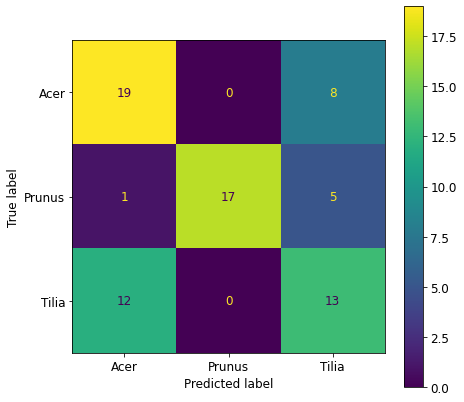

In [95]:
# Support Vector Machines

model, y_pred = train_SVM(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test, '3cat_balanced50_SVM.png')

output_performance_report(y_test, y_pred, 'SVM_3cat_balanced50.csv')

Accuracy: 0.7866666666666666
F1: 0.7883071044515407
Precision: 0.7980627705627705
Recall: 0.7980627705627705


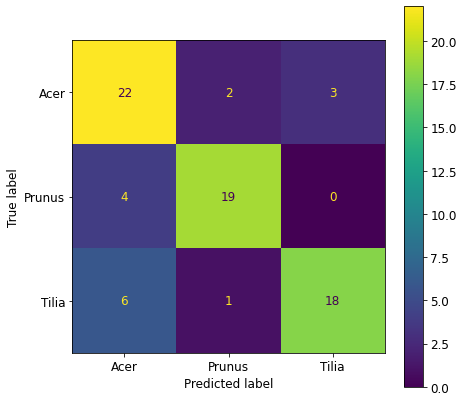

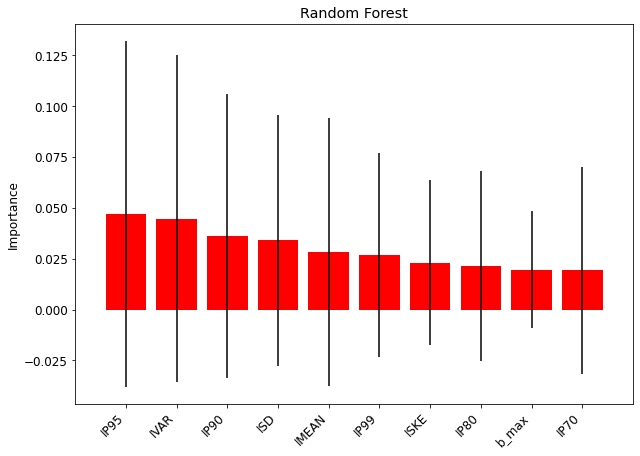

In [99]:
# Random Forest

model, y_pred = train_RF(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test, '3cat_balanced50_RF.png')

feature_importance_rank(model, 'Random Forest', '3cat_balanced50_RF_feature_rank.eps')

output_performance_report(y_test, y_pred, 'RF_3cat_balanced50.csv')

Accuracy: 0.6133333333333333
F1: 0.6150253555967841
Precision: 0.674059829059829
Recall: 0.674059829059829


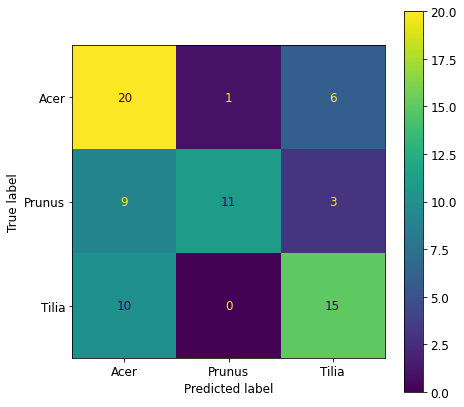

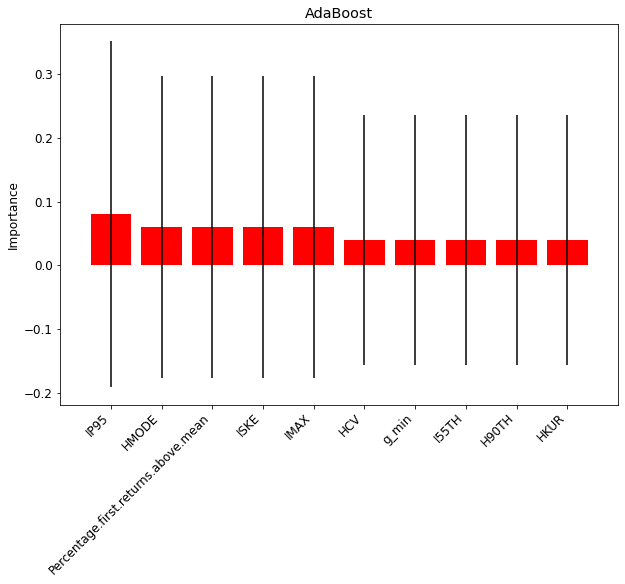

In [101]:
# AdaBoost

model, y_pred = train_AB(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test,'3cat_balanced50_AB.png')

feature_importance_rank(model, 'AdaBoost', '3cat_balanced50_AB_feature_rank.png')

output_performance_report(y_test, y_pred, 'AB_3cat_balanced50.csv')